# Project Overview
Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [127]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


### Exploratory Data Analysis

In [128]:
# checking the dataframe information
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   DR_NO         185715 non-null  int64 
 1   Date Rptd     185715 non-null  object
 2   DATE OCC      185715 non-null  object
 3   TIME OCC      185715 non-null  object
 4   AREA NAME     185715 non-null  object
 5   Crm Cd Desc   185715 non-null  object
 6   Vict Age      185715 non-null  int64 
 7   Vict Sex      185704 non-null  object
 8   Vict Descent  185705 non-null  object
 9   Weapon Desc   73502 non-null   object
 10  Status Desc   185715 non-null  object
 11  LOCATION      185715 non-null  object
dtypes: int64(2), object(10)
memory usage: 17.0+ MB


In [129]:
# checking if there are null values in the dataframe
crimes.isnull().sum()

DR_NO                0
Date Rptd            0
DATE OCC             0
TIME OCC             0
AREA NAME            0
Crm Cd Desc          0
Vict Age             0
Vict Sex            11
Vict Descent        10
Weapon Desc     112213
Status Desc          0
LOCATION             0
dtype: int64

We can observe that Victim's sex and descent are sometimes missing while the description of weapon has lot of missing values. To fix this issue, replace the sex and descent of victim as unknown and the weapon description with string "-".

In [130]:
crimes[['Vict Sex', 'Vict Descent']] = crimes[['Vict Sex', 'Vict Descent']].fillna('X')
crimes['Weapon Desc'] = crimes['Weapon Desc'].fillna("-")
crimes.isnull().sum()

DR_NO           0
Date Rptd       0
DATE OCC        0
TIME OCC        0
AREA NAME       0
Crm Cd Desc     0
Vict Age        0
Vict Sex        0
Vict Descent    0
Weapon Desc     0
Status Desc     0
LOCATION        0
dtype: int64

In [131]:
crimes[['Date Rptd', 'TIME OCC', 'DATE OCC']].dtypes

Date Rptd    object
TIME OCC     object
DATE OCC     object
dtype: object

The 'Date Rptd', 'DATE OCC' & 'TIME OCC' columns are of object datatype when they should be of DateTime datatype.

In [132]:
crimes['Date Rptd'] = pd.to_datetime(crimes['Date Rptd'], 
                                     format='%Y-%m-%d').dt.date
crimes['DATE OCC'] = pd.to_datetime(crimes['DATE OCC'], format='%Y/%m/%d').dt.date

In [133]:
crimes['TIME OCC (HMS)'] = pd.to_datetime(crimes['TIME OCC'], format='%H%M', errors='coerce')

Now the 'Date Rptd', 'DATE OCC', 'TIME OCC' are in right datatype to extract data infos.

Now that the exploratory analysis is done, let's start extracting insights from the data.

### Peak crime hour

In [134]:
# first extract hours from 'TIME OCC' column 
# create a new column called hour of occ
crimes['hour of occ'] = crimes['TIME OCC (HMS)'].dt.hour

# converting hours into 12h format with AM/PM
def to_12h(hour):
    if hour == 0:
        return '12AM'
    elif hour < 12:
        return f'{hour}AM'
    elif hour == 12:
        return '12PM'
    else:
        return f'{hour-12}PM'

crimes['hour of occ (12h)'] = crimes['hour of occ'].apply(to_12h)

# finding the peak crime hour (most frequent hour)
peak_crime_hour = crimes['hour of occ'].value_counts().idxmax()
peak_crime_hour

12

surprisingly, most crimes happen in the broad daylight in the middle of the noon at 12PM. This is counter-intuitive as many associate midnight with high crimes. We can visualize the distribution of the hour of occurance in the graph below.

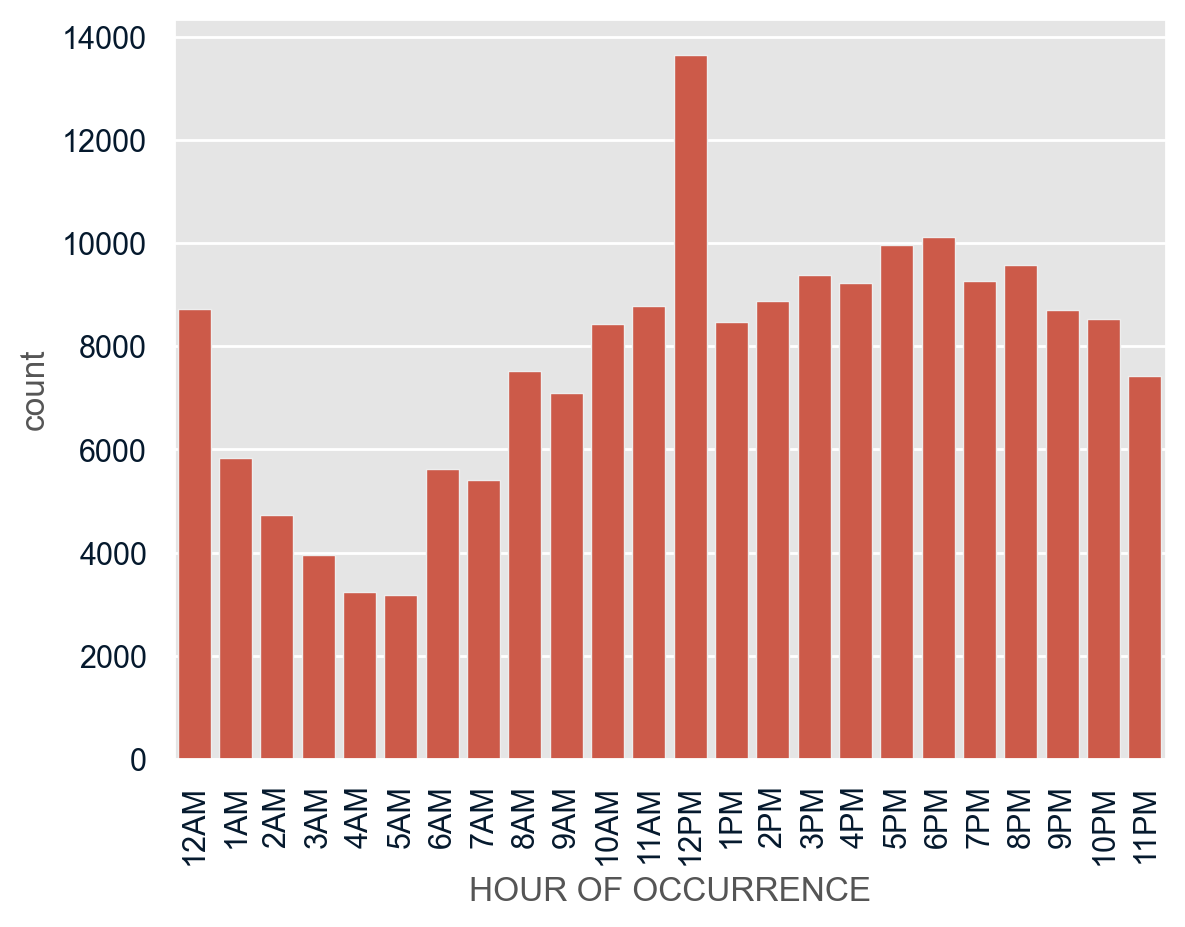

In [135]:
chronological_order = [
    '12AM', '1AM', '2AM', '3AM', '4AM', '5AM', '6AM', '7AM', '8AM', '9AM', '10AM', '11AM',
    '12PM', '1PM', '2PM', '3PM', '4PM', '5PM', '6PM', '7PM', '8PM', '9PM', '10PM', '11PM'
]
crimes['hour of occ (12h)'] = pd.Categorical(
    crimes['hour of occ (12h)'], 
    categories=chronological_order, 
    ordered=True
)
sns.countplot(data=crimes, x='hour of occ (12h)')
sns.set_theme('notebook')
sns.set_palette('colorblind')
plt.xticks(rotation=90)
plt.xlabel('HOUR OF OCCURRENCE')
plt.show()

### Peak night crime location

In [136]:
# subsetting night crimes (10pm to 3:59am)
crimes['TIME OCC'] = crimes['TIME OCC'].astype(int)
night_crimes = crimes[(crimes['TIME OCC'] >= 2200) | (crimes['TIME OCC'] <= 359)]
# setting HMS time properly
night_crimes['TIME OCC (HMS)'] = night_crimes['TIME OCC (HMS)'].dt.time
night_crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,TIME OCC (HMS),hour of occ,hour of occ (12h)
8,231207476,2023-02-27,2020-08-15,1,77th Street,BURGLARY,72,M,B,-,Invest Cont,8800 HAAS AV,00:01:00,0,12AM
10,221711184,2022-06-15,2020-05-15,155,Devonshire,THEFT OF IDENTITY,27,M,B,-,Invest Cont,8300 WHITE OAK AV,01:55:00,1,1AM
30,221314362,2022-07-11,2020-04-07,1,Newton,THEFT OF IDENTITY,53,F,H,-,Invest Cont,1600 E OLYMPIC BL,00:01:00,0,12AM
33,231307252,2023-03-03,2020-07-05,2305,Newton,THEFT OF IDENTITY,22,F,B,-,Invest Cont,6600 S BROADWAY,23:05:00,23,11PM
36,221614254,2022-11-13,2020-01-01,1,Foothill,THEFT OF IDENTITY,22,F,H,-,Invest Cont,10200 TELFAIR AV,00:01:00,0,12AM


In [137]:
# finding the peak location
peak_night_crime_location = night_crimes['AREA NAME'].value_counts().idxmax()
peak_night_crime_location

'Central'

### CRIMES COMMITTED AGAINST THE VICTIMS OF DIFFERENT AGE GROUPS

In [138]:
# identifying number of crimes commited against the victimes of different age groups
age_bins = [0, 17, 25, 34, 44, 54, 64, float('inf')]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

crimes['victim_ages'] = pd.cut(crimes['Vict Age'], bins=age_bins, labels=age_labels, right=True)
victim_ages = crimes.groupby('victim_ages').size().reindex(age_labels, fill_value=0)

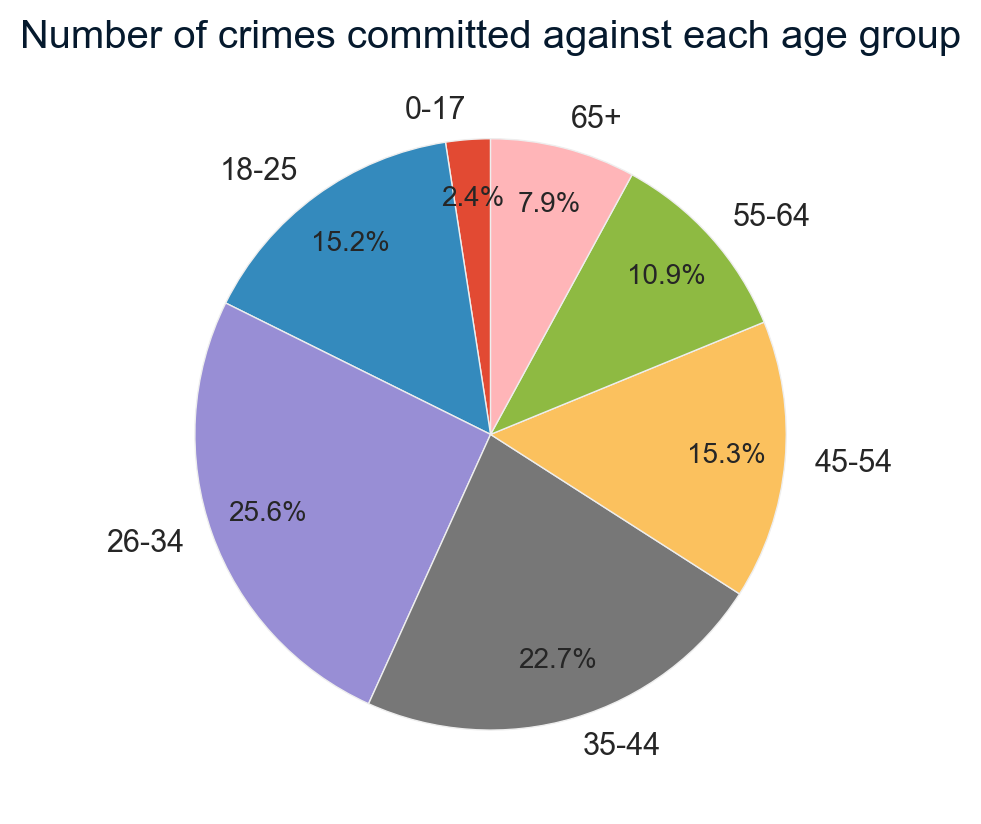

In [139]:
# demonstrating with pie chart
plt.style.use('ggplot')
victim_ages.plot.pie(autopct="%1.1f%%", startangle=90, rotatelabels=False, pctdistance=0.8)
plt.ylabel("")
plt.title("Number of crimes committed against each age group")
plt.show()

This shows that the youth of the age 18-45 are the most vulnerable from the crime. LAPD must take special measure to ensure the safety of the youth in LA.